Данные по титанику скачал отсюда:  
https://www.kaggle.com/c/titanic/data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

Грузим что есть

In [2]:
df_train = pd.read_csv('titanic/train.csv')
df_test = pd.read_csv('titanic/test.csv')
df_gender_submission = pd.read_csv('titanic/gender_submission.csv')

In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
df_test.shape

(418, 11)

In [7]:
df_gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [8]:
df_gender_submission.shape

(418, 2)

### Это определенно задумано, как работа с тестом. Количество совпадает. Это для проверки вырезали целевую переменную. 

Добавим фичу, о принадлежности к трейну или тесту (первичное разбиение).

In [9]:
df_train['IsTrain'] = True
df_test['IsTrain'] = False

###  Соединим данные. Будет первоначальный датасет.  
### Если надо, впоследствии разобъём иначе, чем предлагает Kaggle.

In [10]:
#df1 = pd.concat([df_gender_submission, df_test])

In [11]:
df_test_full= df_gender_submission.merge(df_test, on='PassengerId')
df_test_full.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsTrain
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,False
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,False
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,False
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,False
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,False


In [12]:
df_full = pd.concat([df_train, df_test_full])
df_full.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsTrain
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,True


In [13]:
df_full.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.377387,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.484918,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [14]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  IsTrain      1309 non-null   bool   
dtypes: bool(1), float64(2), int64(5), object(5)
memory usage: 134.2+ KB


---

In [15]:
### Будем работать с df_train. Если на

Проверим, что чем выше социальный статус, тем больше вероятность спасения. Проверим это построив зависимость количества спасишихся и утонувших по классам:

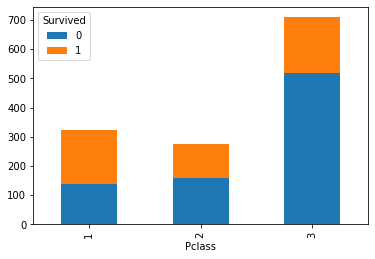

In [16]:
df_full.pivot_table('PassengerId', 'Pclass', 'Survived', 'count').plot(kind='bar', stacked=True)

Верно!

---

Посмотрим, как количество родственнников влияет на факт спасения:

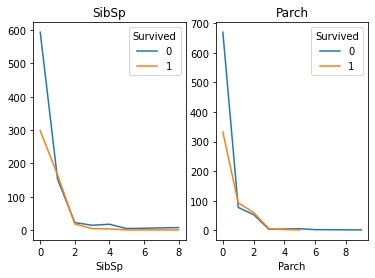

In [17]:
fig, axes = plt.subplots(ncols=2)
df_full.pivot_table('PassengerId', ['SibSp'], 'Survived', 'count').plot(ax=axes[0], title='SibSp')
df_full.pivot_table('PassengerId', ['Parch'], 'Survived', 'count').plot(ax=axes[1], title='Parch')

Верно!

---

Столбец с номерами кают. Насколько пригодятся данные?

In [18]:
df_full.PassengerId[df_train.Cabin.notnull()].count()

296

In [19]:
df_full.shape

(1309, 13)

Поле практически не заполнено, можно опустить.

---

Поле Age (возраст), насколько заполнен:

In [20]:
df_full.PassengerId[df_full.Age.notnull()].count()

1046

Данное поле практически все заполнено. Есть пустые занчения. Зададим это поле медианой по полю:

In [21]:
df_full.Age = df_full.Age.median()

---

Поле Embarked, в котором находится порт посадки. Проверим есть ли пассажиры у которых порт не указан:

In [22]:
df_full[df_full.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsTrain
61,62,1,1,"Icard, Miss. Amelie",female,28.0,0,0,113572,80.0,B28,NaN,True
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,28.0,0,0,113572,80.0,B28,NaN,True


Таких пассажиров двое. Присвоим этим пассажирам порт в котором село больше всего людей:

In [23]:
MaxPassEmbarked = df_full.groupby('Embarked').count()['PassengerId']
df_full.Embarked[df_full.Embarked.isnull()] = MaxPassEmbarked[MaxPassEmbarked == MaxPassEmbarked.max()].index[0]

---

Поле цена (Fare):

In [24]:
df_full.PassengerId[df_full.Fare.isnull()]

152    1044
Name: PassengerId, dtype: int64

In [25]:
df_full[df_full.PassengerId==1044]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsTrain
152,1044,0,3,"Storey, Mr. Thomas",male,28.0,0,0,3701,NaN,NaN,S,False


In [26]:
df_full.Fare[df_full.PassengerId==1044]

152   NaN
Name: Fare, dtype: float64

Заменим медианой:

In [27]:
df_full.Fare.median()

14.4542

In [28]:
df_full.Fare[df_full.PassengerId==1044] = df_full.Fare.median()

Пренебрежем полями 'PassengerId', 'Name','Ticket','Cabin' ...

In [29]:
df_full = df_full.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

Теперь наш набо выглядит так:

In [30]:
df_full.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,IsTrain
0,0,3,male,28.0,1,0,7.2500,S,True
1,1,1,female,28.0,1,0,71.2833,C,True
2,1,3,female,28.0,0,0,7.9250,S,True
3,1,1,female,28.0,1,0,53.1000,S,True
4,0,3,male,28.0,0,0,8.0500,S,True


И созданным полем 'IsTrain' (в первом исполнении работы с данными по методу CRISP - DM)

In [31]:
### df_full = df_full.drop(['IsTrain'],axis=1) ### Нет, так не поступим.

In [32]:
df_full.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,IsTrain
0,0,3,male,28.0,1,0,7.2500,S,True
1,1,1,female,28.0,1,0,71.2833,C,True
2,1,3,female,28.0,0,0,7.9250,S,True
3,1,1,female,28.0,1,0,53.1000,S,True
4,0,3,male,28.0,0,0,8.0500,S,True


In [33]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1309 non-null   int64  
 1   Pclass    1309 non-null   int64  
 2   Sex       1309 non-null   object 
 3   Age       1309 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Fare      1309 non-null   float64
 7   Embarked  1309 non-null   object 
 8   IsTrain   1309 non-null   bool   
dtypes: bool(1), float64(2), int64(4), object(2)
memory usage: 93.3+ KB


Воспользуемся LabelEncoder для соответствующих полей:

In [34]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
dicts = {}

label.fit(df_full.Sex.drop_duplicates())
dicts['Sex'] = list(label.classes_)
df_full.Sex = label.transform(df_full.Sex)

label.fit(df_full.Embarked.drop_duplicates())
dicts['Embarked'] = list(label.classes_)
df_full.Embarked = label.transform(df_full.Embarked)

В итоге наши данные выглядят следующим образом:

In [43]:
df_full.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,IsTrain
0,0,3,1,28.0,1,0,7.2500,2,True
1,1,1,0,28.0,1,0,71.2833,0,True
2,1,3,0,28.0,0,0,7.9250,2,True
3,1,1,0,28.0,1,0,53.1000,2,True
4,0,3,1,28.0,0,0,8.0500,2,True


---

Разделим данные снова на обучающую и тестовую выборку с помощью флага. И дропнем соответсвующую колонку.

In [44]:
df_train = df_full[df_full.IsTrain].drop(columns=['IsTrain'])
df_test = df_full[~df_full.IsTrain].drop(columns=['IsTrain'])

---

In [45]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,28.0,1,0,7.2500,2
1,1,1,0,28.0,1,0,71.2833,0
2,1,3,0,28.0,0,0,7.9250,2
3,1,1,0,28.0,1,0,53.1000,2
4,0,3,1,28.0,0,0,8.0500,2


In [46]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int32  
dtypes: float64(2), int32(2), int64(4)
memory usage: 55.7 KB


In [47]:
df_test.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,28.0,0,0,7.8292,1
1,1,3,0,28.0,1,0,7.0000,2
2,0,2,1,28.0,0,0,9.6875,1
3,0,3,1,28.0,0,0,8.6625,2
4,1,3,0,28.0,1,1,12.2875,2


## 1. Обучаем дерево решений.

In [48]:
X_train = df_train.loc[:, df_train.columns != 'Survived']
y_train = df_train.loc[:, df_train.columns == 'Survived']
X_test = df_test.loc[:, df_test.columns != 'Survived']
y_test = df_test.loc[:, df_test.columns == 'Survived']

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [50]:
clf = DecisionTreeClassifier(max_depth=4)

In [51]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [52]:
y_train_pred = clf.predict(X_train)
accuracy_score(y_train, y_train_pred)

0.8181818181818182

In [53]:
clf.feature_importances_

array([0.15623513, 0.62380649, 0.        , 0.0235538 , 0.0444715 ,
       0.13693259, 0.0150005 ])

In [54]:
X_train.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

При глубине дерева, равной 4, самый важный атрибут оказался 'Sex'.

### 2. Подбираем оптимальную глубину дерева.

In [55]:
from sklearn.model_selection import GridSearchCV

In [56]:
depths = np.arange(1, 10)
criterions= ['gini', 'entropy']
features_num = np.arange(1, 10)
nodes = np.arange(2, 50)

grid = {'max_depth': depths,
        'criterion': criterions,
        'max_features': features_num,
        'max_leaf_nodes': nodes,
        }

gridsearch = GridSearchCV(clf, grid, scoring='accuracy', cv=5, n_jobs=3)

gridsearch.fit(X_train, y_train)
gridsearch.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'max_features': 5,
 'max_leaf_nodes': 46}

In [57]:
gridsearch.cv_results_

{'mean_fit_time': array([0.00658236, 0.00398946, 0.00319138, ..., 0.00299215, 0.00339079,
        0.00329533]),
 'std_fit_time': array([3.65563655e-03, 1.54495661e-03, 3.99160513e-04, ...,
        5.00111031e-07, 7.97629490e-04, 8.65779148e-04]),
 'mean_score_time': array([0.00099792, 0.00119734, 0.00099735, ..., 0.        , 0.        ,
        0.        ]),
 'std_score_time': array([6.84390073e-07, 3.98755398e-04, 3.50402318e-07, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]),
 'param_criterion': masked_array(data=['gini', 'gini', 'gini', ..., 'entropy', 'entropy',
                    'entropy'],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[1, 1, 1, ..., 9, 9, 9],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_features': masked_array(data=[1, 1, 1, ..., 9, 9, 9],
           

Оптимальная глубина дерева равна 8.

In [58]:
clf_final = DecisionTreeClassifier(max_depth=8)

In [59]:
clf_final.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### 3. Самые важные фичи.

In [60]:
clf_final.feature_importances_

array([0.12099831, 0.47800206, 0.        , 0.02430615, 0.05251873,
       0.29354889, 0.03062586])

In [61]:
X_train.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

По-прежнему самый важный атрибут это 'Sex' (пол).

### 4. Визуализируем полученное дерево.

In [ ]:
!pip install pydotplus

In [62]:
from sklearn.tree import export_graphviz

def get_tree_dot_view(clf, feature_names=None, class_names=None):
    print(export_graphviz(clf, out_file=None, filled=True, feature_names=feature_names, class_names=class_names))

In [63]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf_final, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=X_train.columns, class_names=['Lost','Saved'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

In [64]:
graph

In [65]:
#pip install pydot

Как поставить graphviz в Windows 10  
http://diginal.ru/python/narisovat-graf-s-graphviz-v-jupyter-notebook/

In [ ]:
#pip install graphviz

In [ ]:
#conda install python-graphviz

In [ ]:
import sys
sys.path #можно посмотреть что в PATH
graphviz_path = 'D:\\ProgramData\\Anaconda3\\Library\\bin\\graphviz'  #не забыть поправить ... и поставить двойные юниксовые слеши
#sys.path.insert(0, graphviz_path)
#sys.path.remove(graphviz_path) - если что-то пошло не так и путь нужно удалить
!dot -V  #проверить, что всё работает - должен вывести версию graphviz
#http://diginal.ru/python/narisovat-graf-s-graphviz-v-jupyter-notebook/

In [ ]:
!pydotplus -V

In [ ]:
from graphviz import Digraph
dot = Digraph(comment='The Round Table')
dot.node('A', 'King Arthur')
dot.node('B', 'Sir Bedevere the Wise')
dot.node('L', 'Sir Lancelot the Brave')
dot.edges(['AB', 'AL'])
dot.edge('B', 'L', constraint='false')
dot

In [ ]:
graph.write_png("file.png")

In [ ]:
get_tree_dot_view(clf_final, list(X_train), list(label.classes_))

# Дополнительное задание по AUC_ROC

In [71]:
# модели: DecisionTreeClassifier (уже обучили cfl_final, на глубине дерева 8), KNN, LogisticRegression
models = {}

### Добавили модели

In [67]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [73]:
models['DecisionTreeClassifier'] = clf_final
clf_final = DecisionTreeClassifier(max_depth=8)
clf_final.fit(X_train, y_train)
clf_final.score(X_test, y_test)

0.9043062200956937

In [74]:
models['KNN'] = knn
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.7870813397129187

In [75]:
models['LogisticRegression'] = lr
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.9473684210526315

### Качество моделей с помощью кривой AUC_ROC

In [76]:
models

{'DecisionTreeClassifier': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=8, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=None, splitter='best'),
 'KNN': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                      weights='uniform'),
 'LogisticRegression': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start

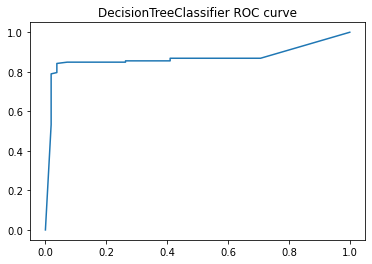

DecisionTreeClassifier ROC AUC score: 0.8684828848436882


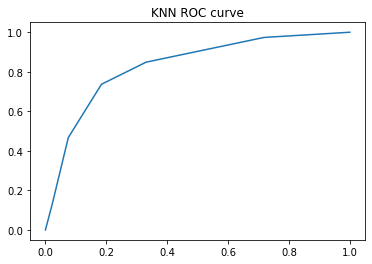

KNN ROC AUC score: 0.8301716462208153


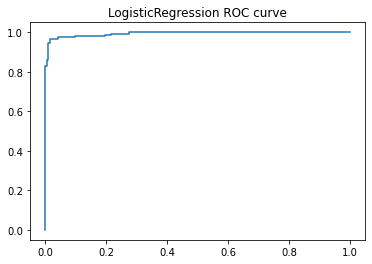

LogisticRegression ROC AUC score: 0.9935199841709539


In [78]:
from sklearn.metrics import roc_curve, roc_auc_score
for name, model in models.items():
    proba = model.predict_proba(X_test)
    fpr, tpr, thres = roc_curve(y_test, proba[:, 1])
    plt.figure()
    plt.title(f'{name} ROC curve')
    plt.plot(fpr, tpr)
    plt.show()
    print(f'{name} ROC AUC score: {roc_auc_score(y_test, proba[:, 1])}')

Лучший результат (практически единичка!) выдаёт логистическая регрессия.  
Дерево решений имеет чуть худший результат по обоим метрикам.  
Метод ближайших соседей проигрывает обоим методам.